In [4]:
!pip install seaborn

  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<h3>Import necessary module</h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Read Dataset</h2> 

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<h2>Pre-processing</h2>

In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [7]:
cat_data = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for i in cat_data:
    df[i] = lb.fit_transform(df[i])

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


<h2>Data Analysis</h2>

C:\Users\sajjan\AppData\Local\Temp\ipykernel_8440\1472774436.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


<Axes: title={'center': 'House Price Distribution Plot'}, xlabel='price', ylabel='Density'>

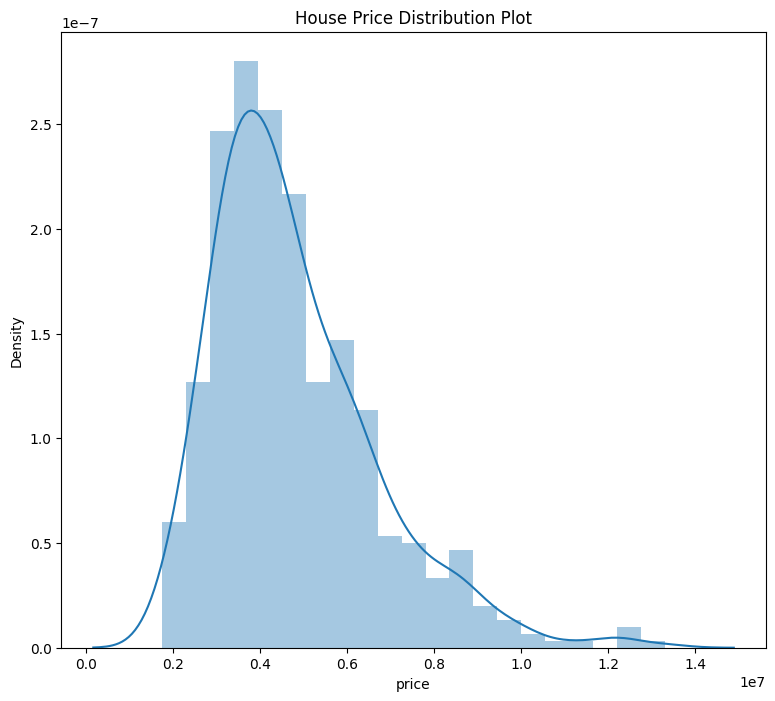

In [9]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(df.price)

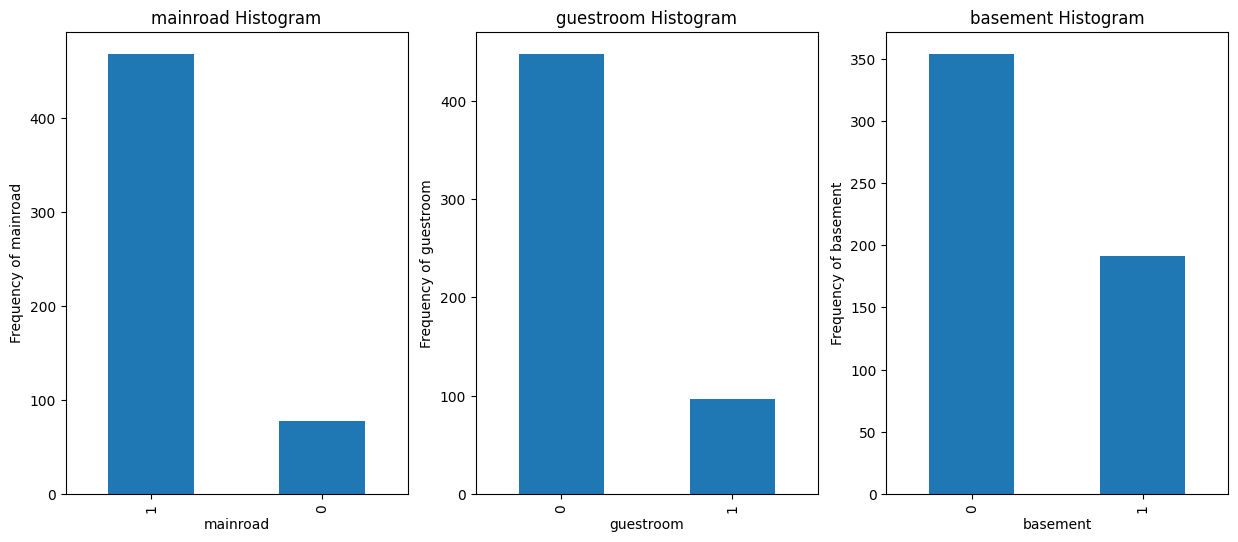

In [10]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt1 = df['mainroad'].value_counts().plot(kind='bar')
plt.title('mainroad Histogram')
plt1.set(xlabel = 'mainroad', ylabel='Frequency of mainroad')

plt.subplot(1,3,2)
plt1 = df['guestroom'].value_counts().plot(kind='bar')
plt.title('guestroom Histogram')
plt1.set(xlabel = 'guestroom', ylabel='Frequency of guestroom')

plt.subplot(1,3,3)
plt1 = df['basement'].value_counts().plot(kind='bar')
plt.title('basement Histogram')
plt1.set(xlabel = 'basement', ylabel='Frequency of basement')

plt.show()

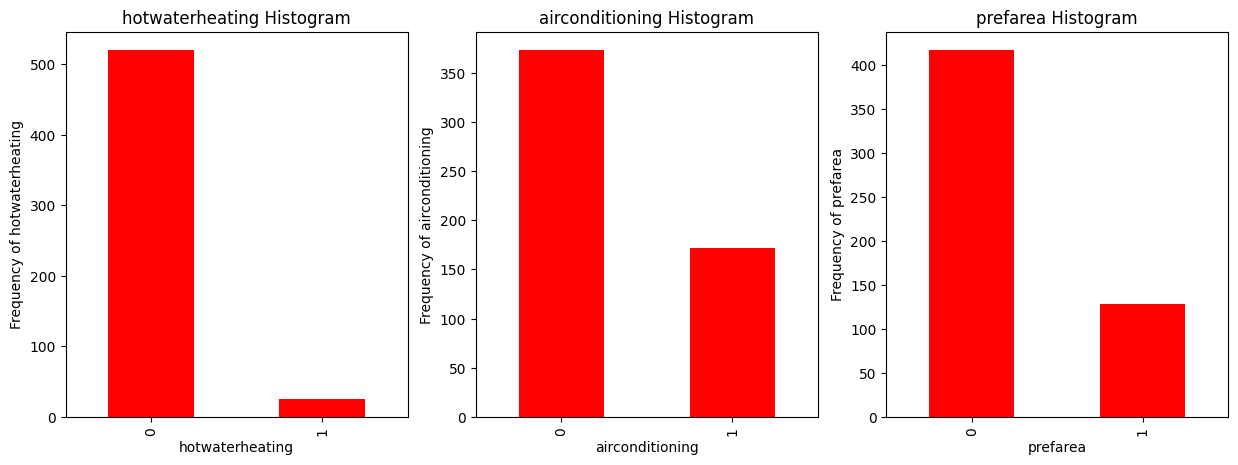

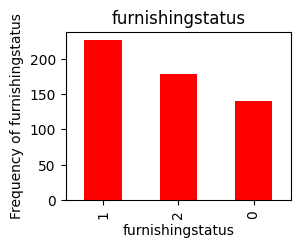

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt1 = df['hotwaterheating'].value_counts().plot(kind='bar',color='r')
plt.title('hotwaterheating Histogram')
plt1.set(xlabel = 'hotwaterheating', ylabel='Frequency of hotwaterheating')

plt.subplot(1, 3, 2)
plt1 = df['airconditioning'].value_counts().plot(kind='bar',color='r')
plt.title('airconditioning Histogram')
plt1.set(xlabel = 'airconditioning', ylabel='Frequency of airconditioning')

plt.subplot(1, 3, 3)
plt1 = df['prefarea'].value_counts().plot(kind='bar',color='r')
plt.title('prefarea Histogram')
plt1.set(xlabel = 'prefarea', ylabel='Frequency of prefarea')
plt.show()

plt.subplot(2, 2, 3)
plt1 = df['furnishingstatus'].value_counts().plot(kind='bar',color='r')
plt.title('furnishingstatus')
plt1.set(xlabel = 'furnishingstatus', ylabel='Frequency of furnishingstatus')
plt.show()

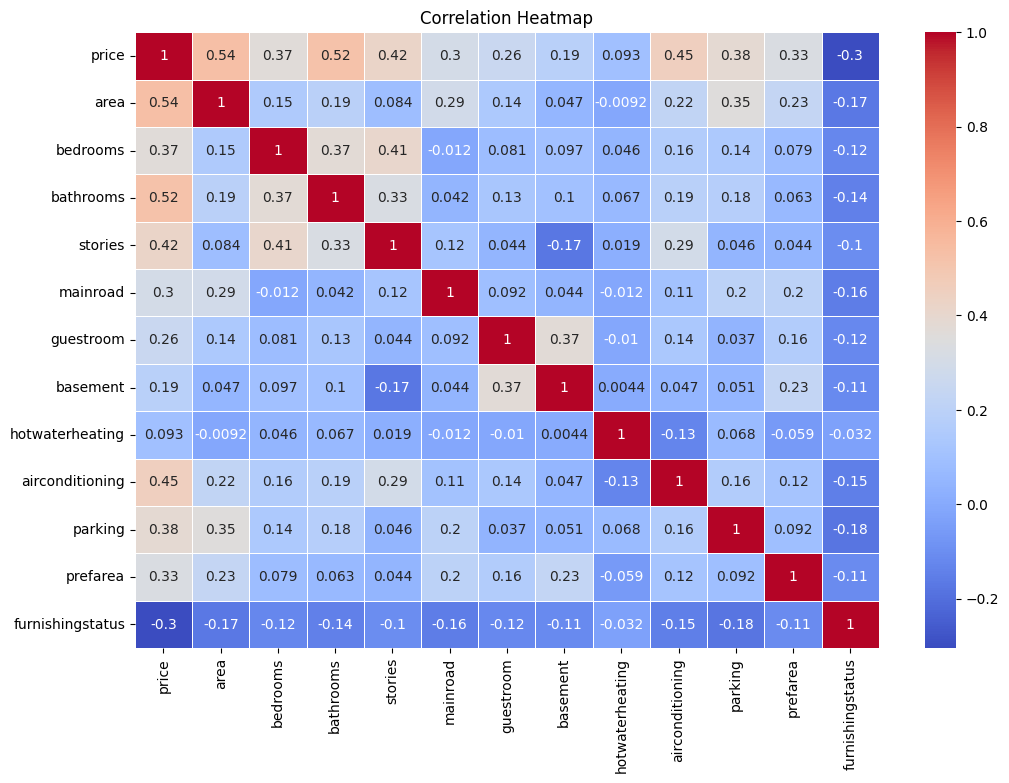

In [12]:
cor_matrix= df.corr()
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<h2>Feature Enginnering</h2>

In [24]:
# # from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df)
# scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [25]:
# scaled_df.head()

In [13]:
x=df.drop('price',axis=1)
y=df.price

In [14]:
print(x.head())
print(y.head())
print(type(x))
print(type(y))

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 0  
1                0                1        3         0                 0  
2                0                0        2         1                 1  
3                0                1        3         1                 0  
4                0                1        2         0                 0  
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64
<class 'pandas.core.f

<h3>Train Test split</h3>

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,confusion_matrix,r2_score

In [23]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 5)

In [24]:
print(x_train.shape,"",type(x_train))
print(y_train.shape,"\t ",type(y_train))
print(x_test.shape,"",type(x_test))
print(y_test.shape,"\t ",type(y_test))

(381, 12)  <class 'pandas.core.frame.DataFrame'>
(381,) 	  <class 'pandas.core.series.Series'>
(164, 12)  <class 'pandas.core.frame.DataFrame'>
(164,) 	  <class 'pandas.core.series.Series'>


<h2>Training of the model</h2>

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
LRmodel = LinearRegression()
LRmodel.fit(x_train,y_train)

LinearRegression()

<h4>saving model to disk</h4>

<h2>Model Evaluation</h2>

In [22]:
def eval(model):
    print("The training score is,",model.score(x_train,y_train),end='\n')
    print("The testing score is,",model.score(x_test,y_test))

In [28]:
def metric_score(ypred,y_test):
    print("The mean absolute error is: ",mean_absolute_error(ypred,y_test))
    print("The mean squared error is: ",mean_squared_error(ypred,y_test))
    print("The R2 score is: ",r2_score(ypred,y_test))

In [29]:
eval(LRmodel)

The training score is, 0.6722721620878298
The testing score is, 0.6701127297811889


In [30]:
ypred3 = LRmodel.predict(x_test)

In [32]:
#  on average, the model's predictions have an absolute error of around 721,569.65 units from the actual values
# model's predictions have a squared error of around 827,865,989,822.31 units from the actual values
# model accounts for roughly 56.14% of the variability in the target variable
metric_score(ypred3,y_test)

The mean absolute error is:  721569.6538611307
The mean squared error is:  827865989822.3123
The R2 score is:  0.561406451455535


<h4>loading model to disk</h4>